In [ ]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('StudentsPerformance.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
X = df.drop(columns=['math score'], axis = 1)
y = df['math score']

In [9]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
# Creating column trainformer
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Converting categorical features to numerical using one-hot encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",ohe_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features),
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [14]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [20]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

### Creating evaluation function to evaluate the model training

In [24]:
def evaluation_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square    

In [25]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Ada Boost Regressor': AdaBoostRegressor(),
    'SVR': SVR(),
    'CatBoosting Regressor': CatBoostRegressor(),
    'XGBoost Regressor': XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):

    model = list(models.values())[i]
    model.fit(X_train, y_train) # Training the model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluating the model
    model_train_mae, model_train_rmse, model_train_r2 = evaluation_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluation_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Training Data Model Performance")
    print(f"Training data Mean Absolute Error: {model_train_mae}")
    print(f"Training data Root Mean Squared Error: {model_train_rmse}")
    print(f"Training data R2 Score: {model_train_r2}")

    print("----------------------------------------------------------------")

    print("Testing Data Model Performance")
    print(f"Testing data Mean Absolute Error: {model_test_mae}")
    print(f"Testing data Root Mean Squared Error: {model_test_rmse}")
    print(f"Testing data R2 Score: {model_test_r2}")

    r2_list.append(model_test_r2)

    print("----------------------------------------------------------------")
    print("\n")

Linear Regression
Training Data Model Performance
Training data Mean Absolute Error: 4.266711846071957
Training data Root Mean Squared Error: 5.323050852720514
Training data R2 Score: 0.8743172040139593
----------------------------------------------------------------
Testing Data Model Performance
Testing data Mean Absolute Error: 4.21476314247485
Testing data Root Mean Squared Error: 5.393993869732843
Testing data R2 Score: 0.8804332983749565
----------------------------------------------------------------


Ridge
Training Data Model Performance
Training data Mean Absolute Error: 4.264987823725981
Training data Root Mean Squared Error: 5.323324922741654
Training data R2 Score: 0.8743042615212909
----------------------------------------------------------------
Testing Data Model Performance
Testing data Mean Absolute Error: 4.2111006880142625
Testing data Root Mean Squared Error: 5.390387016935642
Testing data R2 Score: 0.8805931485028737
-----------------------------------------------

### Results

<Axes: ylabel='Model'>

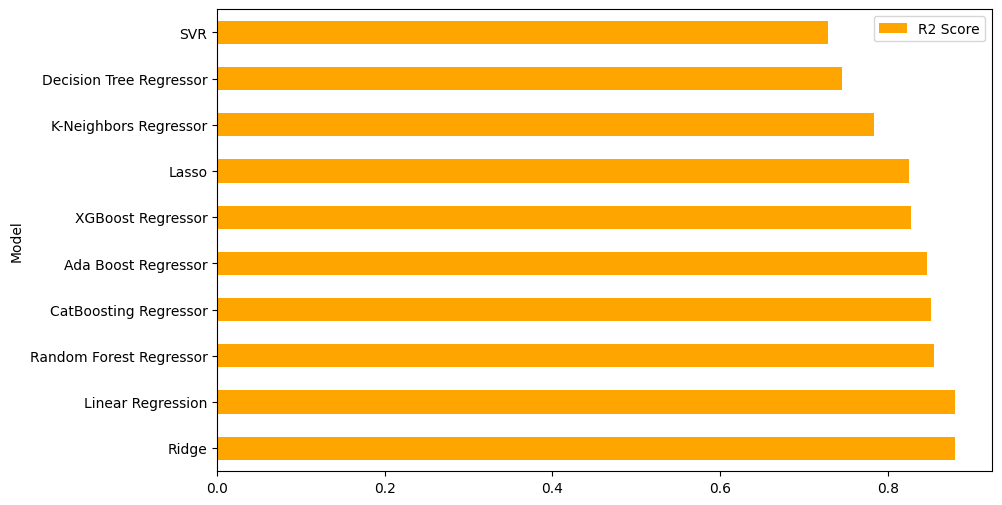

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False).set_index('Model').plot(kind='barh', figsize=(10, 6), color='orange')

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
1,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.855826
8,CatBoosting Regressor,0.851632
6,Ada Boost Regressor,0.847421
9,XGBoost Regressor,0.827797
2,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.745540
7,SVR,0.728600


In [28]:
pred_df = pd.DataFrame({'Actual_Values': y_test, "Predicted_Values": y_test_pred, 'Difference': y_test - y_test_pred})

In [29]:
pred_df 

,Actual_Values,Predicted_Values,Difference
521,91,72.256554,18.743446
737,53,51.827824,1.172176
740,80,79.382545,0.617455
660,74,74.103836,-0.103836
411,84,84.875084,-0.875084
...,...,...,...
408,52,46.441635,5.558365
332,62,60.034035,1.965965
208,74,67.617630,6.382370
613,65,69.601791,-4.601791
